# Pose Estimation Flow

In [1]:
data_dir = "data/calib"
videos_dir = "data/calib/original"
videos_detected_dir = "data/calib/detected"
csvs_dir = "data/calib/csvs"
matrices_dir = "data/matrices"
experiment_timestamp = "20210526-132415" 

### Camera Matrices Calculation

![title](calibration-instructions.png)

#### Inner Matrices and Distortion

In [3]:
from get_calibration_matrices import cameras_frames_extractor, create_new_calibration_matrices_file

1. for extracting frames from a video calibration video. after extraction you'll need to keep only the frames with full and clear chessboard

In [3]:
calibration_dir = "data/calib/camera_calibration"
cameras_frames_extractor(calibration_dir)

reading video additional_calibration_shoot_nimrod_1_back_20210712-113224 
reading video additional_calibration_shoot_nimrod_1_left_20210712-113224 ██████████████████████████████████████-| 100.0% 
reading video additional_calibration_shoot_nimrod_1_right_20210712-113224 █████████████████████████████████████-| 100.0% 
reading video additional_calibration_shoot_nimrod_1_top_20210712-113224 ███████████████████████████████████████-| 100.0% 
Progress:  |███████████████████████████████████████████████████████████████████████████████████████████████████-| 100.0% 
finished extracting frames from all videos.
now, in each folder, manully delete frames *not* containing the chess board fully or clearly!
it's best that each folder will contain around 150-200 frames.


2. creating a ptyhon matrices file from the folders containing the chess borad frames. If the new matrices file you created is different from the one in matrices.py in the project, consider replacing the existing one. If you are using the same cameras, it is not expected to change significantly.

In [ ]:
calibration_dir = "data/calib/camera_calibration"
create_new_calibration_matrices_file(calibration_dir, 'new_matrices')

*** calculating calibration matrices for TOP camera ***
1/3: loading frames
2/3: calculating calibration matrices, please wait...


#### External Camera-Arena Matrices

In this part, we'll calculate the external matrix, the enables translating from camera coordinates to arena coordinates.

In [2]:
square_size = 2.5
board_inner_x = 9
board_inner_y = 6

arena_width = 68.3
arena_length = 97.0
arena_height = 45

calibration_dir = "data/calib/chess_boards"
experiment_timestamp = "2021"

In [3]:
%run calculate_cameras_matrices -h

usage: calculate_cameras_matrices.py [-h] [-d VIDEOS_DIR] [-m MATRICES_DIR] [-t TIMESTAMP]

optional arguments:
  -h, --help            show this help message and exit
  -d VIDEOS_DIR, --videos_dir VIDEOS_DIR
                        directory of the input videos
  -m MATRICES_DIR, --matrices_dir MATRICES_DIR
                        directory of output matrices
  -t TIMESTAMP, --timestamp TIMESTAMP
                        the timestamp of the experiment


Notice: manual calibration would open a window with the first frame of the video. Please select 3d coordinates that you can see in the picture and the rightclick the matching points.

In [12]:
import pickle
from camera import Camera 
selected_back_points = [[8.85,2.5,0], 
                        [8.85,15.0,0],
                        [16.35,5.0,0],  
                       [21.35,12.5,0],
                        [28.85,2.5,0], 
                        [28.85,15.0,0]]
selected_back_pixels = [[408, 436], [539, 435], [413, 479], [486, 513], [347, 566], [500, 572]]

selected_left_points = [
   [ 94.5,65.8,0],
    [94.5,53.3,0],
    [87.0,63.3,0], 
    [82.0,55.8,0],
    [74.5,53.3,0],
    [28.85,15.0,0],
]

selected_left_pixels = [[644, 73], [747, 103], [623, 106], [660, 146], [638, 189], [766, 848]]


manual_chosen_points = f'{calibration_dir}/manual_points.data'
with open(manual_chosen_points, 'wb') as file:
    pickle.dump({Camera.BACK: (selected_back_points, selected_back_pixels)
            , Camera.LEFT: (selected_left_points, selected_left_pixels)}, file)

analyzing calibration_double_chessboards_back_20210803-141605.mp4
Chessboard was not detected, Need to do manual calibration
Enter yes for manual calibrationyes
Enter yes for manual fileno
choose 6 arena points with known coordinates
enter 1 x,y,z8.85,2.5,0
enter 2 x,y,z8.85,15.0,0
enter 3 x,y,z16.35,5.0,0
enter 4 x,y,z21.35,12.5,0
enter 5 x,y,z28.85,2.5,0
enter 6 x,y,z28.85,15.0,0
right click point (8.85, 2.5, 0.0)
right click point (8.85, 15.0, 0.0)
right click point (16.35, 5.0, 0.0)
right click point (21.35, 12.5, 0.0)
right click point (28.85, 2.5, 0.0)
right click point (28.85, 15.0, 0.0)
selected points:  [[408, 436], [539, 435], [413, 479], [486, 513], [347, 566], [500, 572]]


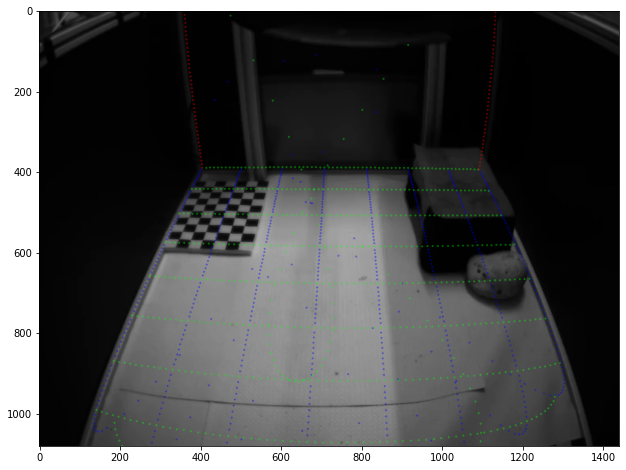

done analyzing calibration_double_chessboards_back_20210803-141605.mp4
writing matric to: data/matrices\calibration_double_chessboards_back_20210803-141605_matrix.data
analyzing calibration_double_chessboards_left_20210803-141605.mp4
Chessboard was not detected, Need to do manual calibration
Enter yes for manual calibrationyes
Enter yes for manual fileyes
[[94.5, 65.8, 0], [94.5, 53.3, 0], [87.0, 63.3, 0], [82.0, 55.8, 0], [74.5, 53.3, 0], [28.85, 15.0, 0]] [[644, 73], [747, 103], [623, 106], [660, 146], [638, 189], [766, 848]]


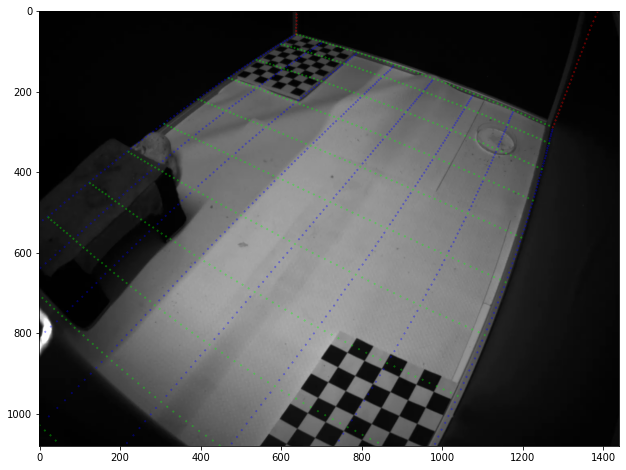

done analyzing calibration_double_chessboards_left_20210803-141605.mp4
writing matric to: data/matrices\calibration_double_chessboards_left_20210803-141605_matrix.data
analyzing calibration_double_chessboards_right_20210803-141605.mp4
saved indexed chess board to:  data/calib/chess_boards/chess_board_with_indexes_Camera.RIGHT.png
initiating calibration based on chess board coordinates:
enter point 0 x in arena8.85
enter point 0 y in arena15
is point 0 closer then point 1 to the x zero line? enter 1 if it is, -1 otherwise1
is point 0 closer then point 9 to the y zero line? enter 1 if it is, -1 otherwise-1
match index with position on board


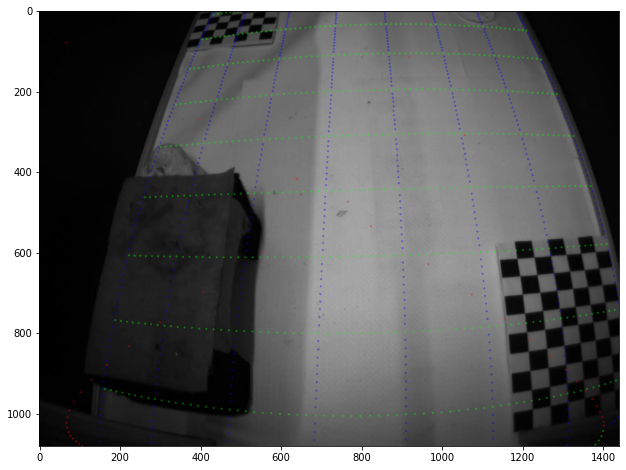

done analyzing calibration_double_chessboards_right_20210803-141605.mp4
writing matric to: data/matrices\calibration_double_chessboards_right_20210803-141605_matrix.data
analyzing calibration_double_chessboards_top_20210803-141605.mp4
saved indexed chess board to:  data/calib/chess_boards/chess_board_with_indexes_Camera.TOP.png
initiating calibration based on chess board coordinates:
enter point 0 x in arena74.5
enter point 0 y in arena65.8
is point 0 closer then point 1 to the x zero line? enter 1 if it is, -1 otherwise1
is point 0 closer then point 9 to the y zero line? enter 1 if it is, -1 otherwise-1
match index with position on board


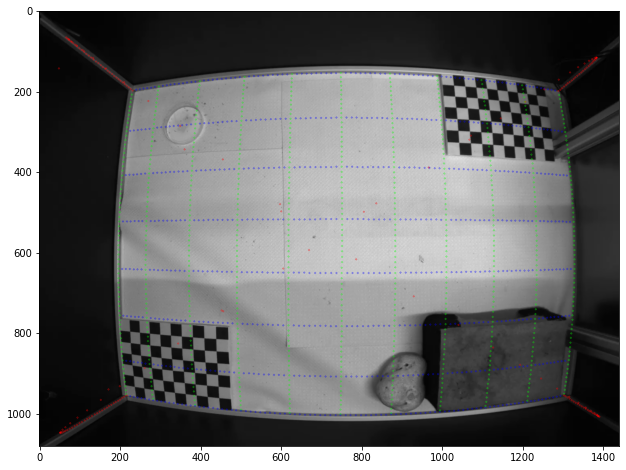

done analyzing calibration_double_chessboards_top_20210803-141605.mp4
writing matric to: data/matrices\calibration_double_chessboards_top_20210803-141605_matrix.data
Sanity check: printing location of cameras relatively to the arena
Camera.TOP [[47.66262952]
 [31.11826744]
 [77.44306357]]
Camera.LEFT [[96.33278958]
 [65.33233651]
 [55.04057381]]
Camera.RIGHT [[94.79377393]
 [ 3.62336712]
 [54.09170127]]
Camera.BACK [[ 1.44009377]
 [32.31297144]
 [50.85373923]]


In [18]:
%run calculate_cameras_matrices -d {calibration_dir} -p {manual_chosen_points} -t {experiment_timestamp}  -m {matrices_dir}

Helpers: print the coordinates of each inner corner in the chessboard.

In [5]:
chess_board_gap_left_corner_x = arena_length
chess_board_gap_left_corner_y = arena_width
x_y_to_coordinates = {}
for i in range(1, board_inner_x +1):
    for j in range(1,board_inner_y +1):
        x_y_to_coordinates[f'{i,j}']= f'{chess_board_gap_left_corner_x - (2.5 *i)},{chess_board_gap_left_corner_y-(2.5 *j)}'
print(x_y_to_coordinates)

{'(1, 1)': '94.5,65.8', '(1, 2)': '94.5,63.3', '(1, 3)': '94.5,60.8', '(1, 4)': '94.5,58.3', '(1, 5)': '94.5,55.8', '(1, 6)': '94.5,53.3', '(2, 1)': '92.0,65.8', '(2, 2)': '92.0,63.3', '(2, 3)': '92.0,60.8', '(2, 4)': '92.0,58.3', '(2, 5)': '92.0,55.8', '(2, 6)': '92.0,53.3', '(3, 1)': '89.5,65.8', '(3, 2)': '89.5,63.3', '(3, 3)': '89.5,60.8', '(3, 4)': '89.5,58.3', '(3, 5)': '89.5,55.8', '(3, 6)': '89.5,53.3', '(4, 1)': '87.0,65.8', '(4, 2)': '87.0,63.3', '(4, 3)': '87.0,60.8', '(4, 4)': '87.0,58.3', '(4, 5)': '87.0,55.8', '(4, 6)': '87.0,53.3', '(5, 1)': '84.5,65.8', '(5, 2)': '84.5,63.3', '(5, 3)': '84.5,60.8', '(5, 4)': '84.5,58.3', '(5, 5)': '84.5,55.8', '(5, 6)': '84.5,53.3', '(6, 1)': '82.0,65.8', '(6, 2)': '82.0,63.3', '(6, 3)': '82.0,60.8', '(6, 4)': '82.0,58.3', '(6, 5)': '82.0,55.8', '(6, 6)': '82.0,53.3', '(7, 1)': '79.5,65.8', '(7, 2)': '79.5,63.3', '(7, 3)': '79.5,60.8', '(7, 4)': '79.5,58.3', '(7, 5)': '79.5,55.8', '(7, 6)': '79.5,53.3', '(8, 1)': '77.0,65.8', '(8, 2)': 

In [4]:
chess_board_gap_left_corner_x = 6.35
chess_board_gap_left_corner_y = 0
x_y_to_coordinates = {}
for i in range(1, board_inner_x +1):
    for j in range(1,board_inner_y +1):
        x_y_to_coordinates[f'{i,j}']= f'{chess_board_gap_left_corner_x + 2.5 *i},{chess_board_gap_left_corner_y + 2.5 *j}'
print(x_y_to_coordinates)

{'(1, 1)': '8.85,2.5', '(1, 2)': '8.85,5.0', '(1, 3)': '8.85,7.5', '(1, 4)': '8.85,10.0', '(1, 5)': '8.85,12.5', '(1, 6)': '8.85,15.0', '(2, 1)': '11.35,2.5', '(2, 2)': '11.35,5.0', '(2, 3)': '11.35,7.5', '(2, 4)': '11.35,10.0', '(2, 5)': '11.35,12.5', '(2, 6)': '11.35,15.0', '(3, 1)': '13.85,2.5', '(3, 2)': '13.85,5.0', '(3, 3)': '13.85,7.5', '(3, 4)': '13.85,10.0', '(3, 5)': '13.85,12.5', '(3, 6)': '13.85,15.0', '(4, 1)': '16.35,2.5', '(4, 2)': '16.35,5.0', '(4, 3)': '16.35,7.5', '(4, 4)': '16.35,10.0', '(4, 5)': '16.35,12.5', '(4, 6)': '16.35,15.0', '(5, 1)': '18.85,2.5', '(5, 2)': '18.85,5.0', '(5, 3)': '18.85,7.5', '(5, 4)': '18.85,10.0', '(5, 5)': '18.85,12.5', '(5, 6)': '18.85,15.0', '(6, 1)': '21.35,2.5', '(6, 2)': '21.35,5.0', '(6, 3)': '21.35,7.5', '(6, 4)': '21.35,10.0', '(6, 5)': '21.35,12.5', '(6, 6)': '21.35,15.0', '(7, 1)': '23.85,2.5', '(7, 2)': '23.85,5.0', '(7, 3)': '23.85,7.5', '(7, 4)': '23.85,10.0', '(7, 5)': '23.85,12.5', '(7, 6)': '23.85,15.0', '(8, 1)': '26.35,2

Draft:
back camera- 
8.85,2.5,0 (1,1)
8.85,15.0,0 (1,6)
16.35,5.0,0 (4,2)
21.35,12.5,0 (6,5)
28.85,2.5,0 (9,1)
28.85,15.0,0 (9, 6)
selected_back_pixels = [[408, 436], [539, 435], [413, 479], [486, 513], [347, 566], [500, 572]]

left camera
(1, 1): '94.5,65.8,0'
(1, 6): '94.5,53.3,0'
(4, 2): '87.0,63.3,0'
(6, 5): '82.0,55.8,0'
(9, 6): '74.5,53.3,0'
 
 0 point chessboard
(9, 6): '28.85,15.0,0'

selected points:  [[644, 73], [747, 103], [623, 106], [660, 146], [638, 189], [766, 848]]

Top camera
(0,0): 74.5,65.8

Right camera
(0,0): 8.85,15.0,0
1, -1

### Examine data

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import os
files = [file for file in os.listdir(csvs_dir) if experiment_timestamp in file and 'filtered' not in file]
files

['calib_long_back_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500.csv',
 'calib_long_left_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500.csv',
 'calib_long_right_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500.csv',
 'calib_long_top_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500.csv']

In [4]:
from smooth_2d_pose_estimation import write_filtered_data 

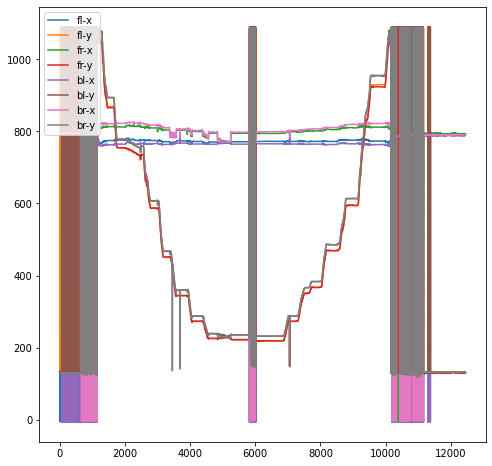

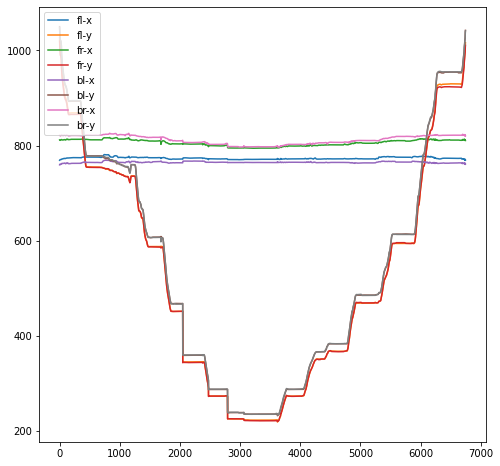

calib_long_back_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500
output: data/calib/csvs/calib_long_back_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500_filtered.csv


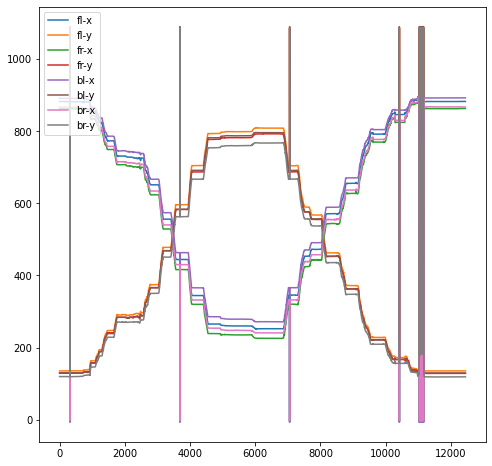

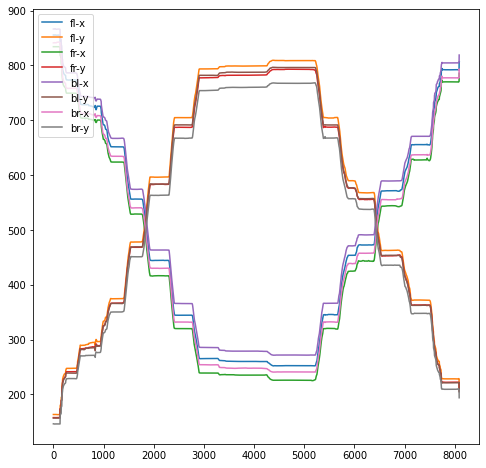

calib_long_left_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500
output: data/calib/csvs/calib_long_left_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500_filtered.csv


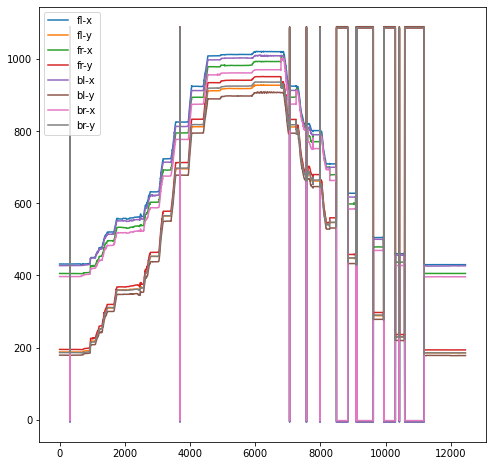

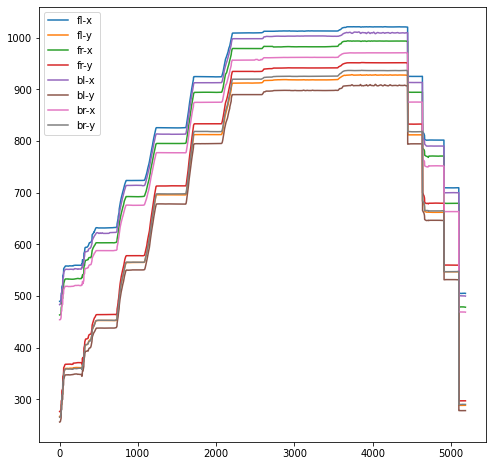

calib_long_right_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500
output: data/calib/csvs/calib_long_right_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500_filtered.csv


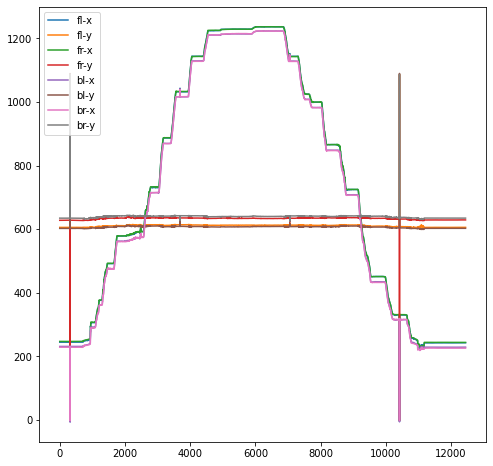

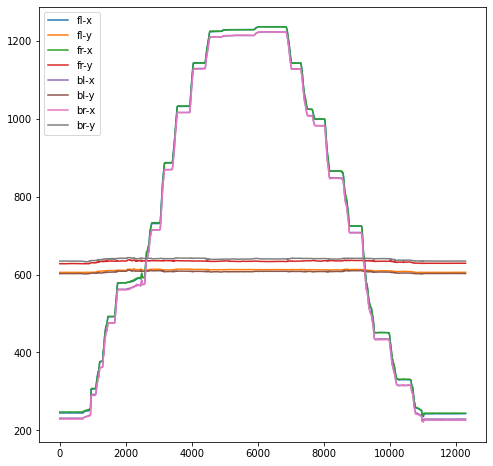

calib_long_top_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500
output: data/calib/csvs/calib_long_top_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500_filtered.csv


In [5]:
for file in files:
    write_filtered_data(csvs_dir, file)

### Transform pixels to 3d coordinates 

In [7]:
%run pixels_locations_to_arena_coordinates -h

usage: pixels_locations_to_arena_coordinates.py [-h] [-o OUTPUT] [--csv CSV] [-m MATRICES_DIR] [-t TIMESTAMP]
                                                [-l LIKELIHOOD] [-f FILTER] [-v VIDEOS_DIR] [-s SHOW_VIDEO]

optional arguments:
  -h, --help            show this help message and exit
  -o OUTPUT, --output OUTPUT
                        directory of the output
  --csv CSV
  -m MATRICES_DIR, --matrices_dir MATRICES_DIR
                        directory of the input matrices
  -t TIMESTAMP, --timestamp TIMESTAMP
                        the timestamp of the experiment
  -l LIKELIHOOD, --likelihood LIKELIHOOD
                        the minimum likelihood of points to use
  -f FILTER, --filter FILTER
                        file name filter
  -v VIDEOS_DIR, --videos_dir VIDEOS_DIR
                        the videos dir if you want to visualize result
  -s SHOW_VIDEO, --show_video SHOW_VIDEO


In [10]:
%run pixels_locations_to_arena_coordinates -o {videos_detected_dir} --csv {csvs_dir} -t {experiment_timestamp} -f filtered -l 0.95 -m {matrices_dir}

read experiments csvs: ['calib_long_back_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500_filtered.csv', 'calib_long_left_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500_filtered.csv', 'calib_long_right_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500_filtered.csv', 'calib_long_top_20210526-132415DLC_resnet50_calib_all_V2Jul12shuffle1_49500_filtered.csv']
analyzing camera: Camera.BACK
Progress:  |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
analyzing camera: Camera.LEFT
Progress:  |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
analyzing camera: Camera.RIGHT
Progress:  |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
analyzing camera: Camera.TOP
Progress:  |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


### Show results videos

In [33]:
video_name = "calib_width_back_20210526-134439.mp4"
detected_video_name = "134439_back_detected.mp4"

In [34]:
from IPython.display import HTML
from os import path
video_path=path.join(videos_dir, video_name)
detected_video_path=path.join(videos_detected_dir, detected_video_name)
HTML(f"""
<video width=450 controls>
      <source src="{video_path}" type="video/mp4">
</video>
<video width=450 controls>
      <source src="{detected_video_path}" type="video/mp4">
</video>
""")

### Analyze data

In [11]:
import pandas as pd
csv_path = r'data/calib/detected\points\20210526-132415_points_073120211912.csv'
df = pd.read_csv(csv_path)
df

,topFLx,leftFLx,rightFLx,backFLx,topFLy,leftFLy,rightFLy,backFLy,topFLz,leftFLz,...,rightdirectionx,backdirectionx,topdirectiony,leftdirectiony,rightdirectiony,backdirectiony,topdirectionz,leftdirectionz,rightdirectionz,backdirectionz
0,7.965387,NaN,NaN,NaN,31.925882,NaN,NaN,NaN,6.257831,NaN,...,NaN,NaN,31.258265,NaN,NaN,NaN,7.084237,NaN,NaN,NaN
1,7.965387,NaN,NaN,NaN,31.925882,NaN,NaN,NaN,6.257831,NaN,...,NaN,NaN,31.258265,NaN,NaN,NaN,7.084237,NaN,NaN,NaN
2,7.965387,NaN,NaN,NaN,31.925882,NaN,NaN,NaN,6.257831,NaN,...,NaN,NaN,31.258265,NaN,NaN,NaN,7.084237,NaN,NaN,NaN
3,7.965387,NaN,NaN,NaN,31.925882,NaN,NaN,NaN,6.257831,NaN,...,NaN,NaN,31.258265,NaN,NaN,NaN,7.084237,NaN,NaN,NaN
4,9.266273,NaN,NaN,NaN,31.902091,NaN,NaN,NaN,8.552852,NaN,...,NaN,NaN,31.281073,NaN,NaN,NaN,9.415751,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12441,8.968125,NaN,NaN,NaN,31.852283,NaN,NaN,NaN,8.355111,NaN,...,NaN,NaN,31.187005,NaN,NaN,NaN,9.198083,NaN,NaN,NaN
12442,8.968125,NaN,NaN,NaN,31.852283,NaN,NaN,NaN,8.355111,NaN,...,NaN,NaN,31.187005,NaN,NaN,NaN,9.198083,NaN,NaN,NaN
12443,8.968125,NaN,NaN,NaN,31.852283,NaN,NaN,NaN,8.355111,NaN,...,NaN,NaN,31.187005,NaN,NaN,NaN,9.198083,NaN,NaN,NaN
12444,8.968125,NaN,NaN,NaN,31.852283,NaN,NaN,NaN,8.355111,NaN,...,NaN,NaN,31.187005,NaN,NaN,NaN,9.198083,NaN,NaN,NaN


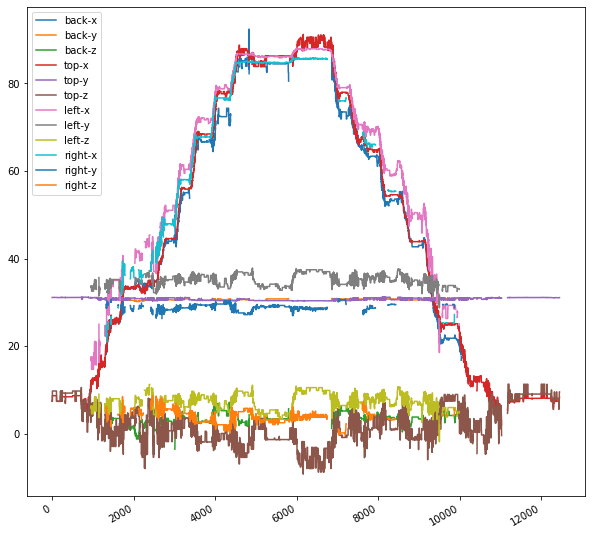

In [12]:
x = df['backcenterx']
y = df['backcentery']
z = df['backcenterz']
topx = df['topcenterx']
topy = df['topcentery']
topz = df['topcenterz']
leftx = df['leftcenterx']
lefty = df['leftcentery']
leftz = df['leftcenterz']
rightx = df['rightcenterx']
righty = df['rightcentery']
rightz = df['rightcenterz']
time = list(range(len(x)))
import matplotlib.pyplot as plt
# plot
plt.figure(figsize=(10,10))
plt.plot(time,x, label='back-x')
plt.plot(time,y, label='back-y')
plt.plot(time,z, label='back-z')

plt.plot(time,topx, label='top-x')
plt.plot(time,topy, label='top-y')
plt.plot(time,topz, label='top-z')

plt.plot(time,leftx, label='left-x')
plt.plot(time,lefty, label='left-y')
plt.plot(time,leftz, label='left-z')

plt.plot(time,rightx, label='right-x')
plt.plot(time,righty, label='right-y')
plt.plot(time,rightz, label='right-z')
plt.gcf().autofmt_xdate()

plt.legend(loc='upper left')
plt.show()

In [13]:
from scipy.signal import savgol_filter
fieldnames = ["backcenterx", "backcentery","topcenterz", "topcenterx", "topcentery","topcenterz",
             "leftcenterx", "leftcentery","leftcenterz", "rightcenterx", "rightcentery","rightcenterz"]
df.dropna(inplace=True)
df = df.apply(lambda x: savgol_filter(x,61,2) if x.name in fieldnames else x)

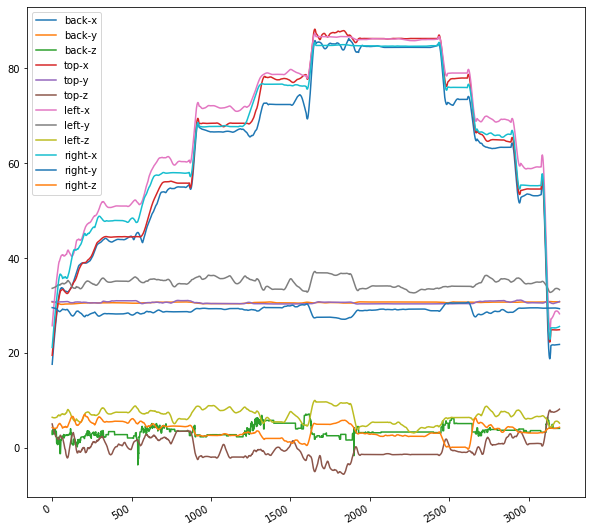

In [14]:
x = df['backcenterx']
y = df['backcentery']
z = df['backcenterz']
topx = df['topcenterx']
topy = df['topcentery']
topz = df['topcenterz']
leftx = df['leftcenterx']
lefty = df['leftcentery']
leftz = df['leftcenterz']
rightx = df['rightcenterx']
righty = df['rightcentery']
rightz = df['rightcenterz']
time = list(range(len(x)))
import matplotlib.pyplot as plt
# plot
plt.figure(figsize=(10,10))
plt.plot(time,x, label='back-x')
plt.plot(time,y, label='back-y')
plt.plot(time,z, label='back-z')

plt.plot(time,topx, label='top-x')
plt.plot(time,topy, label='top-y')
plt.plot(time,topz, label='top-z')

plt.plot(time,leftx, label='left-x')
plt.plot(time,lefty, label='left-y')
plt.plot(time,leftz, label='left-z')

plt.plot(time,rightx, label='right-x')
plt.plot(time,righty, label='right-y')
plt.plot(time,rightz, label='right-z')
plt.gcf().autofmt_xdate()

plt.legend(loc='upper left')
plt.show()

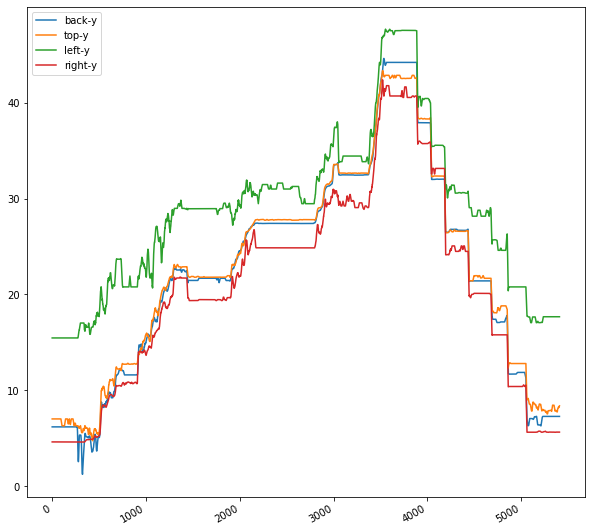

In [8]:
x = df['backcentery']
topx = df['topcentery']
leftx = df['leftcentery']
rightx = df['rightcentery']
time = list(range(len(x)))
import matplotlib.pyplot as plt
# plot
plt.figure(figsize=(10,10))
plt.plot(time,x, label='back-y')
plt.plot(time,topx, label='top-y')
plt.plot(time,leftx, label='left-y')
plt.plot(time,rightx, label='right-y')
plt.gcf().autofmt_xdate()

plt.legend(loc='upper left')
plt.show()

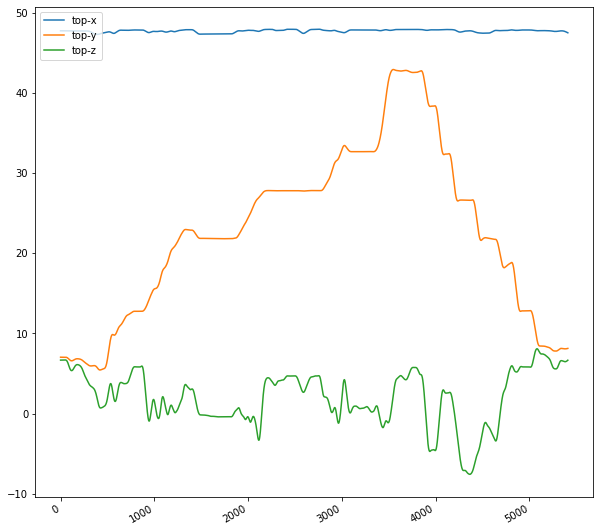

In [35]:
import matplotlib.pyplot as plt
# plot
plt.figure(figsize=(10,10))

plt.plot(time,topx, label='top-x')
plt.plot(time,topy, label='top-y')
plt.plot(time,topz, label='top-z')
plt.gcf().autofmt_xdate()

plt.legend(loc='upper left')
plt.show()